In [1]:
# Import Needed Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'f6f537de83784ff598bbf6f8d7bc5237'
secret = 'cf96af9e5ccd42399f8a11f58c7a873b'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
artist_name = []
track_name = []
popularity = []
track_id = []
duration_ms = []
key = []
time_signature = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
valence = []
tempo = []

      

In [4]:
import timeit
start = timeit.default_timer()

# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 6.3132654839999995


In [5]:
import pandas as pd

df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97
2,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95
3,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94
4,Pop Smoke,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,96


In [6]:
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 0
Time to run this code (in seconds): 2.281090002999999


In [7]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (1000, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.2210,https://api.spotify.com/v1/audio-analysis/3tjF...,0.700,140526,0.722,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,audio_features,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
1,0.0194,https://api.spotify.com/v1/audio-analysis/4Oun...,0.935,187541,0.454,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,0.3750,133.073,4,https://api.spotify.com/v1/tracks/4Oun2ylbjFKM...,audio_features,spotify:track:4Oun2ylbjFKMPTiaSbbCih,0.357
2,0.1140,https://api.spotify.com/v1/audio-analysis/0PvF...,0.823,190476,0.586,0PvFJmanyNQMseIFrU708S,0.000000,6,0.1930,-6.606,0,0.2000,125.971,4,https://api.spotify.com/v1/tracks/0PvFJmanyNQM...,audio_features,spotify:track:0PvFJmanyNQMseIFrU708S,0.347
3,0.2440,https://api.spotify.com/v1/audio-analysis/2SAq...,0.761,261493,0.518,2SAqBLGA283SUiwJ3xOUVI,0.000035,0,0.1070,-8.871,1,0.1340,133.976,4,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,audio_features,spotify:track:2SAqBLGA283SUiwJ3xOUVI,0.522
4,0.6500,https://api.spotify.com/v1/audio-analysis/1tkg...,0.709,160000,0.548,1tkg4EHVoqnhR6iFEXb60y,0.000002,10,0.1330,-8.493,1,0.3530,83.995,4,https://api.spotify.com/v1/tracks/1tkg4EHVoqnh...,audio_features,spotify:track:1tkg4EHVoqnhR6iFEXb60y,0.543


In [8]:
full_df = df_tracks.join(df_audio_features)

In [9]:
full_df.head()

,artist_name,track_name,track_id,popularity,acousticness,analysis_url,danceability,duration_ms,energy,id,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100,0.2210,https://api.spotify.com/v1/audio-analysis/3tjF...,0.700,140526,0.722,3tjFYV6RSFtuktYl3ZtYcq,...,0.2720,-3.558,0,0.0369,90.989,4,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,audio_features,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97,0.0194,https://api.spotify.com/v1/audio-analysis/4Oun...,0.935,187541,0.454,4Oun2ylbjFKMPTiaSbbCih,...,0.0824,-7.509,1,0.3750,133.073,4,https://api.spotify.com/v1/tracks/4Oun2ylbjFKM...,audio_features,spotify:track:4Oun2ylbjFKMPTiaSbbCih,0.357
2,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95,0.1140,https://api.spotify.com/v1/audio-analysis/0PvF...,0.823,190476,0.586,0PvFJmanyNQMseIFrU708S,...,0.1930,-6.606,0,0.2000,125.971,4,https://api.spotify.com/v1/tracks/0PvFJmanyNQM...,audio_features,spotify:track:0PvFJmanyNQMseIFrU708S,0.347
3,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94,0.2440,https://api.spotify.com/v1/audio-analysis/2SAq...,0.761,261493,0.518,2SAqBLGA283SUiwJ3xOUVI,...,0.1070,-8.871,1,0.1340,133.976,4,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,audio_features,spotify:track:2SAqBLGA283SUiwJ3xOUVI,0.522
4,Pop Smoke,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,96,0.6500,https://api.spotify.com/v1/audio-analysis/1tkg...,0.709,160000,0.548,1tkg4EHVoqnhR6iFEXb60y,...,0.1330,-8.493,1,0.3530,83.995,4,https://api.spotify.com/v1/tracks/1tkg4EHVoqnh...,audio_features,spotify:track:1tkg4EHVoqnhR6iFEXb60y,0.543


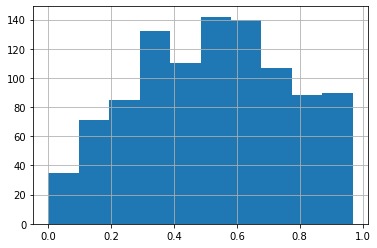

In [10]:
full_df['valence'].hist()

In [11]:
full_df = full_df.drop(['analysis_url','track_href','uri','id'],axis=1)

In [12]:
full_df['key'].value_counts()

1     137
6     120
5      99
11     94
7      90
0      88
8      79
10     74
9      71
4      70
2      60
3      18
Name: key, dtype: int64

In [13]:
full_df['feature_artist/songname'] = full_df['track_name']

In [14]:
time_pop = full_df.groupby(['time_signature']).agg({'popularity':'mean'}).reset_index()

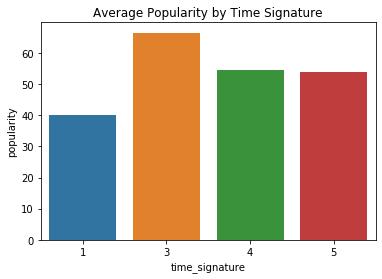

In [15]:
sns.barplot(x=time_pop['time_signature'],y=time_pop['popularity']);
plt.title('Average Popularity by Time Signature');

In [16]:
time_pop_sum = full_df.groupby(['time_signature']).agg({'popularity':'sum'}).reset_index()

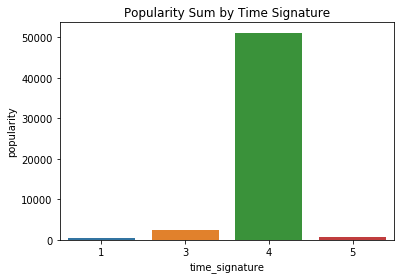

In [17]:
sns.barplot(x=time_pop_sum['time_signature'],y=time_pop_sum['popularity']);
plt.title('Popularity Sum by Time Signature');

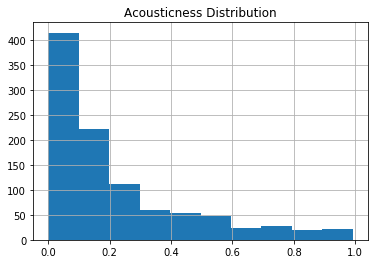

In [18]:
full_df['acousticness'].hist()
plt.title('Acousticness Distribution');

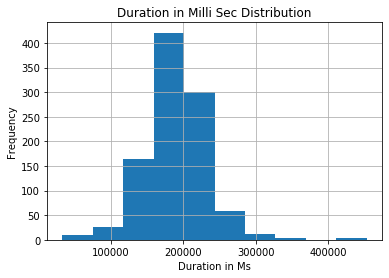

In [19]:
full_df['duration_ms'].hist()
plt.title('Duration in Milli Sec Distribution')
plt.xlabel('Duration in Ms')
plt.ylabel('Frequency');

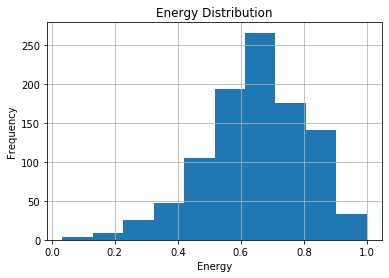

In [20]:
full_df['energy'].hist()
plt.title('Energy Distribution');
plt.xlabel('Energy')
plt.ylabel('Frequency');

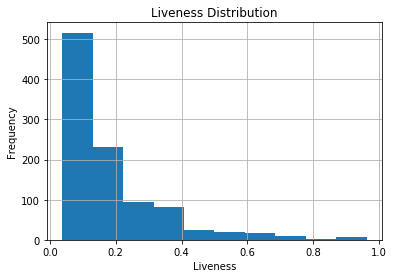

In [21]:
full_df['liveness'].hist()
plt.title('Liveness Distribution');
plt.xlabel('Liveness')
plt.ylabel('Frequency');

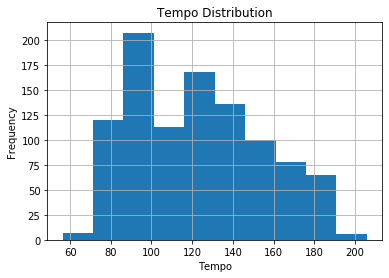

In [22]:
full_df['tempo'].hist()
plt.title('Tempo Distribution');
plt.xlabel('Tempo')
plt.ylabel('Frequency');

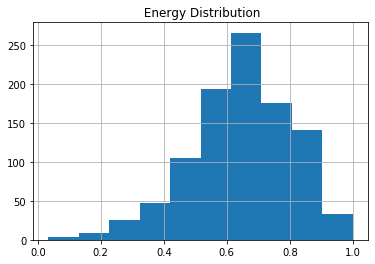

In [23]:
df_audio_features['energy'].hist()
plt.title(' Energy Distribution');

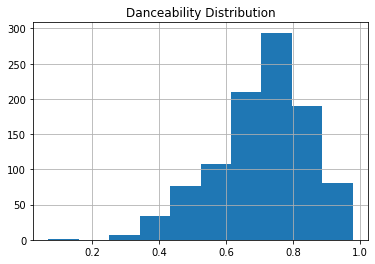

In [24]:
df_audio_features['danceability'].hist()
plt.title('Danceability Distribution');

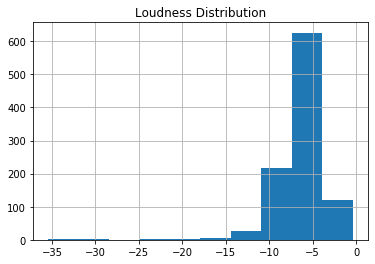

In [25]:
df_audio_features['loudness'].hist()
plt.title('Loudness Distribution');

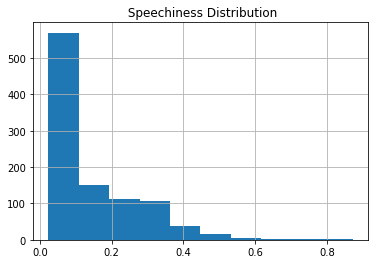

In [26]:
df_audio_features['speechiness'].hist()
plt.title(' Speechiness Distribution');

In [27]:
key_pop = full_df.groupby(['key']).agg({'popularity':'mean'}).reset_index()

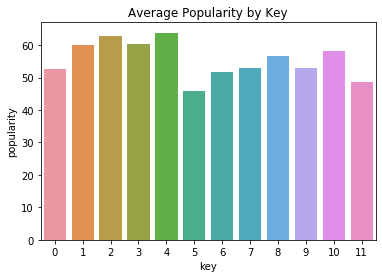

In [28]:
sns.barplot(x=key_pop['key'],y=key_pop['popularity']);
plt.title('Average Popularity by Key');

In [29]:
key_pop_sum = full_df.groupby(['key']).agg({'popularity':'sum'}).reset_index()

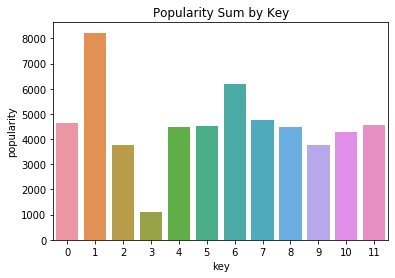

In [30]:
sns.barplot(x=key_pop_sum['key'],y=key_pop_sum['popularity']);
plt.title('Popularity Sum by Key');

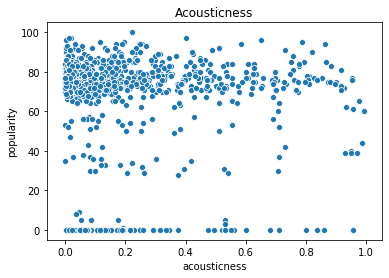

In [31]:
sns.scatterplot(x="acousticness", y="popularity", data=full_df)
plt.title('Acousticness');

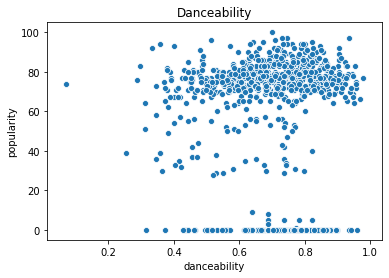

In [32]:
sns.scatterplot(x="danceability", y="popularity", data=full_df)
plt.title('Danceability');

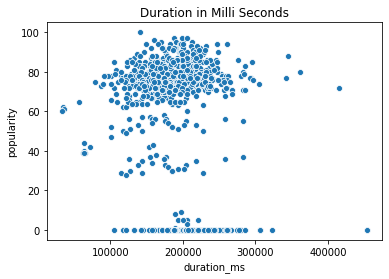

In [33]:
sns.scatterplot(x="duration_ms", y="popularity", data=full_df)
plt.title('Duration in Milli Seconds');

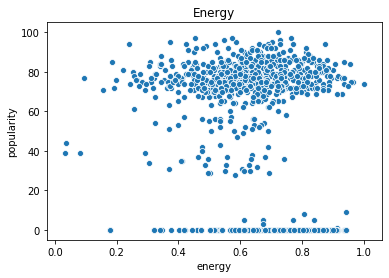

In [34]:
sns.scatterplot(x="energy", y="popularity", data=full_df)
plt.title('Energy');

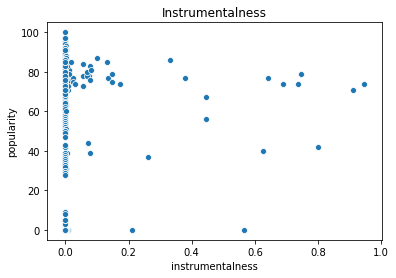

In [35]:
sns.scatterplot(x="instrumentalness", y="popularity", data=full_df)
plt.title('Instrumentalness');

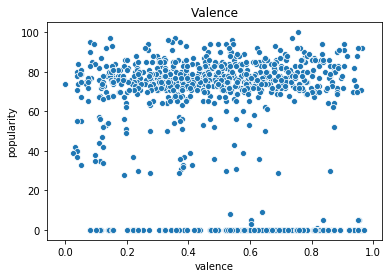

In [36]:
sns.scatterplot(x="valence", y="popularity", data=full_df)
plt.title('Valence');

In [37]:
df = full_df[full_df['popularity'] > 25]

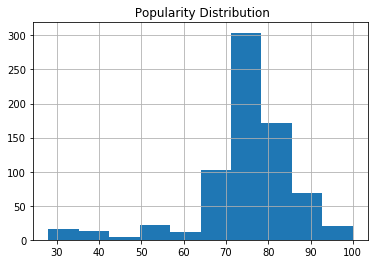

In [38]:
df['popularity'].hist()
plt.title(' Popularity Distribution');

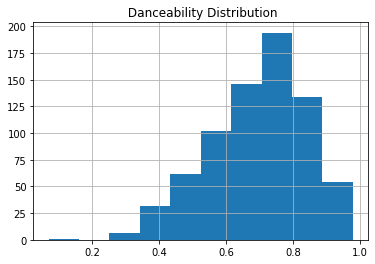

In [39]:
df['danceability'].hist()
plt.title(' Danceability Distribution');

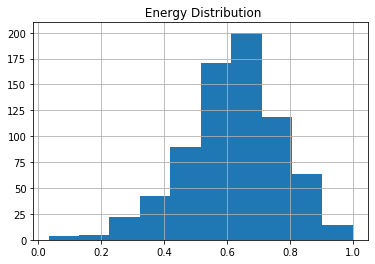

In [40]:
df['energy'].hist()
plt.title(' Energy Distribution');

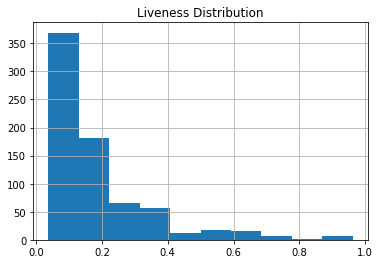

In [41]:
df['liveness'].hist()
plt.title('Liveness Distribution');

# Splitting Training and Testing Data

In [42]:
# Come back to this and figure it out
y = df['popularity']
X = df.drop(['popularity','artist_name', 'track_name', 'track_id','type','feature_artist/songname'],axis=1)

# Train test split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.2, random_state=2)

In [44]:

print(f'The shape of X_Train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of X_val is {X_val.shape}')
print(f'The shape of Y_Train is {y_train.shape}')
print(f'The shape of Y_test is {y_test.shape}')
print(f'The shape of Y_val is {y_val.shape}')


The shape of X_Train is (467, 13)
The shape of X_test is (147, 13)
The shape of X_val is (117, 13)
The shape of Y_Train is (467,)
The shape of Y_test is (147,)
The shape of Y_val is (117,)


In [45]:
import warnings
warnings.filterwarnings('ignore')

# Linear Regression Vanilla

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
# instantiate the model
linreg = LinearRegression()
# fit the model to the train data
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# get the prediction
y_preds = linreg.predict(X_val)
# calculate the mse
mse_linreg = mean_squared_error(y_val, y_preds)

In [49]:

# print the mse
print(f'the mean squared error for Linear Regression Vanilla is: {mse_linreg}'.title())
print(f'The R^2 value is : {r2_score(y_val, y_preds)}')
print(f'The cross val score is : {np.mean(cross_val_score(linreg,X,y, cv=3))}')

The Mean Squared Error For Linear Regression Vanilla Is: 100.22694747191427
The R^2 value is : 0.08385694085628614
The cross val score is : -1.34448131255436


# XGBoost Vanilla

In [50]:
# instantiate the model
xgb = xgboost.XGBRegressor()
# fit the model to training data
xgb.fit(X_train,y_train)


[14:29:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [51]:
xgb_y_preds = xgb.predict(X_val)
mse_xgb = mean_squared_error(y_val,xgb_y_preds)
mse_xgb

85.06515163770165

In [52]:
print(f'The R^2 value of the XGBoost Model is : {r2_score(y_val,xgb_y_preds)} ')
print(f'The Mean squared error for the XGBoost model is {mse_xgb}')
print(f'The cross val score is : {np.mean(cross_val_score(xgb,X,y, cv=3))}')

The R^2 value of the XGBoost Model is : 0.22244615631214293 
The Mean squared error for the XGBoost model is 85.06515163770165
[14:29:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:30:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:30:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The cross val score is : -1.539276037196706


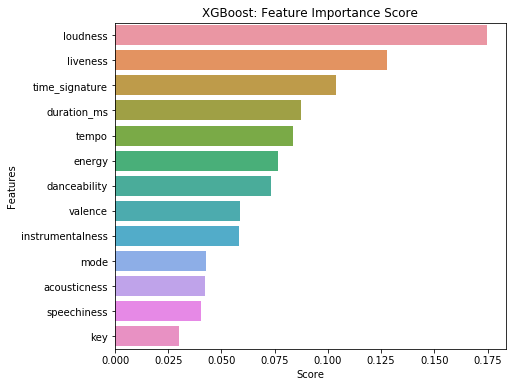

In [53]:
xgb_feat_imp = pd.DataFrame(xgb.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=xgb_feat_imp.index,x=xgb_feat_imp[0],orient='h');
plt.title('XGBoost: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

# AdaBoost Vanilla

In [54]:
# instantaite adaboost model
ada = AdaBoostRegressor()

# fit the model to the train data
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [55]:
# get the prediction
ada_preds = ada.predict(X_val)
# get the MSE
mse_ada = mean_squared_error(y_val, ada_preds)
#print the mse
print(f'The Mean squared error for the ada boost model is {mse_ada}')
print(f'The R^2 value is : {ada.score(X_train,y_train)} ')
#print(f'The cross val score is : {np.mean(cross_val_score(ada,X,y, cv=3))}')

The Mean squared error for the ada boost model is 97.47031985251948
The R^2 value is : 0.5071818903150302 


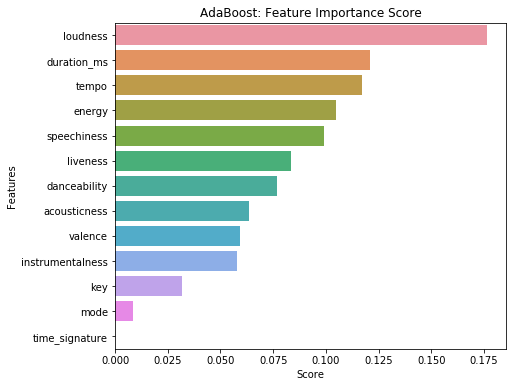

In [56]:
ada_feat_imp = pd.DataFrame(ada.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=ada_feat_imp.index,x=ada_feat_imp[0],orient='h');
plt.title('AdaBoost: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

# GradientBoosting 

In [57]:
# import needed library
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
# instantiate the model
gdb = GradientBoostingRegressor()
# fit the model to training data
gdb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
# get predictions
gdb_preds = gdb.predict(X_val)

#get MeanSE
mse_gdb = mean_squared_error(gdb_preds,y_val)

print(f'the mean squared error for gradient boosting test data is {mse_gdb}')
print(f'The R^2 value is : {r2_score(y_val,gdb_preds)}')
print(f'The cross val score is : {np.mean(cross_val_score(gdb,X,y, cv=3))}')

the mean squared error for gradient boosting test data is 85.19433284973888
The R^2 value is : 0.22126535141121695
The cross val score is : -1.465710970487624


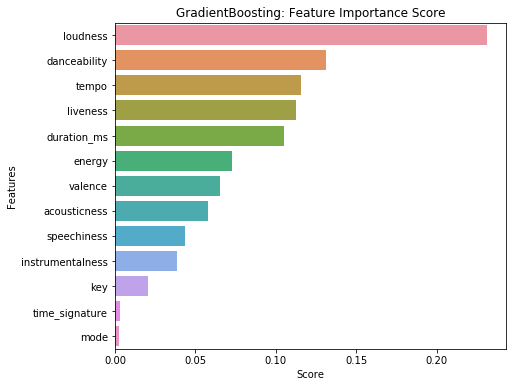

In [60]:
gdb_feat_imp = pd.DataFrame(gdb.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=gdb_feat_imp.index,x=gdb_feat_imp[0],orient='h');
plt.title('GradientBoosting: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

# Random Forest

In [61]:
# instantiate the model
rfr = RandomForestRegressor()

# fit the model to training data
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [62]:
# Get predictions
rfr_preds = rfr.predict(X_val)

# get MSE for model
mse_rfr = mean_squared_error(y_val, rfr_preds)
# print Mse
print(f'The mean squared error for Random Forest Validation Data is: {mse_rfr} ')
print(f'The R^2 value is : {r2_score(y_val,rfr_preds)}')
print(f'The cross val score is : {np.mean(cross_val_score(rfr,X,y, cv=3))}')

The mean squared error for Random Forest Validation Data is: 97.68777217473884 
The R^2 value is : 0.10706674503702618
The cross val score is : -1.6331618187083883


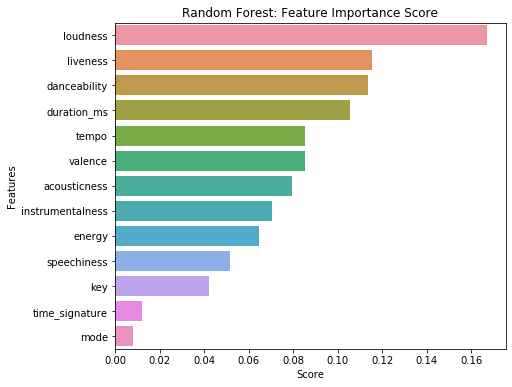

In [63]:
rfr_feat_imp = pd.DataFrame(rfr.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=rfr_feat_imp.index,x=rfr_feat_imp[0],orient='h');
plt.title('Random Forest: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

# End of Vanilla Models

# Feature Engineering

In [65]:
df['artist_name'].nunique()

278

In [66]:
df.shape

(731, 19)

In [67]:
# Change artist names to numbers 

In [68]:
df.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,type,valence,feature_artist/songname
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100,0.2210,0.700,140526,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,audio_features,0.756,Mood (feat. iann dior)
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97,0.0194,0.935,187541,0.454,0.000000,1,0.0824,-7.509,1,0.3750,133.073,4,audio_features,0.357,WAP (feat. Megan Thee Stallion)
2,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95,0.1140,0.823,190476,0.586,0.000000,6,0.1930,-6.606,0,0.2000,125.971,4,audio_features,0.347,For The Night (feat. Lil Baby & DaBaby)
3,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94,0.2440,0.761,261493,0.518,0.000035,0,0.1070,-8.871,1,0.1340,133.976,4,audio_features,0.522,Laugh Now Cry Later (feat. Lil Durk)
4,Pop Smoke,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,96,0.6500,0.709,160000,0.548,0.000002,10,0.1330,-8.493,1,0.3530,83.995,4,audio_features,0.543,What You Know Bout Love


In [73]:
pop_df = df.groupby('artist_name').agg({'popularity':'mean'}).reset_index()

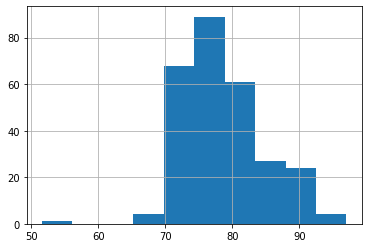

In [74]:
pop_df['popularity'].hist()

In [79]:
for i in pop_df['artist_name']:
    print(i)

$NOT
$uicideBoy$
2 Chainz
21 Savage
24kGoldn
2KBABY
347aidan
42 Dugg
5 Seconds of Summer
6ix9ine
A Boogie Wit da Hoodie
AJR
Alesso
Alexander 23
Ali Gatie
All Time Low
Andrew Jannakos
Anitta
Anuel AA
Ariana Grande
Ashe
Ashnikko
Ava Max
Avenue Beat
BLACKPINK
BRS Kash
BTS
Baby Keem
Bad Bunny
Bankrol Hayden
Bazzi
Beatking
Bebe Rexha
Big Sean
BigKayBeezy
Billie Eilish
Billy Currington
Blake Shelton
Brent Faiyaz
Brett Young
Bring Me The Horizon
Bryson Tiller
CJ
CORPSE
Calvin Harris
Camilo
Cardi B
Carly Pearce
Chase Rice
Chris Brown
Chris Stapleton
City Girls
Claire Rosinkranz
Clean Bandit
Cmten
Cole Swindell
Conan Gray
Cordae
Curtis Waters
DDG
DJ Chose
DJ Khaled
DaBaby
Daddy Yankee
Dan + Shay
Demi Lovato
Diplo
Dixie D’Amelio
Doja Cat
Don Toliver
Drake
DripReport
Dua Lipa
Dustin Lynch
El Fantasma
Ella Mai
Eminem
Epic Soundscapes
Eric Church
Eslabon Armado
FLETCHER
Farruko
Filmore
Flo Milli
Florida Georgia Line
Fousheé
French Montana
Future
G Herbo
G-Eazy
Gabby Barrett
Giveon
Glass Animals
Gra